# Lecture 07: Working with structured data in Python

[Download on GitHub](https://github.com/NumEconCopenhagen/lectures-2022)

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/lectures-2022/master?urlpath=lab/tree/07/Load_save_and_structure_data.ipynb)

1. [Pandas dataframes](#Pandas-dataframes)
2. [Reading and writing data](#Reading-and-writing-data)
3. [Summary](#Summary)


*Before we begin, let's first take a quick [survey on the Inaugural assignment](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UMEZTODYyVjJWSFBPNTVRMzBMQzFYOE5JQiQlQCN0PWcu)*

By and large, handling data sets in Python means working with **Pandas**.  

Pandas is a standard element in the Anaconda package, so you'll have it automatically.  

The fact that Python is a general purpose language *and* has a good way of handling data sets through pandas has helped it become such a popular language for scientific and general purposes.  

Today, you will learn about
1. the pandas **data frame** object and the **pandas series**. 
2. how to **load and save data** both to and from offline sources (e.g. CSV or Excel). 
3. and how to clean, rename, structure and index your data.

**Links:**

1. Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
2. DataCamp's [pandas' cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)
3. DataCamp has additional courses on pandas like [Writing efficient code with pandas](https://app.datacamp.com/learn/courses/writing-efficient-code-with-pandas).
4. About the [pandas project](https://pandas.pydata.org/about/)

In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<a id="Pandas-dataframes"></a>

# 1. Pandas dataframes

In Pandas, the fundamental object of interest is a **pandas dataframe**. 

A pandas data frame is superficially like the data frames you know from stata and sas: it is in 2-d, each column has a name. 

The *data type* of a column in a pandas data frame is a **pandas series**.

A pandas series is **a lot like a numpy array** and they can be used in much the same way.  

A pandas data frame can be thought of as a **dictionary of pandas series**. (Keys are column names) 

To create a DataFrame:

In [63]:
ids = pd.Series([1, 2, 3])
incs = pd.Series([11.7, 13.9, 14.6])
names = pd.Series(['Vitus', 'Maximilian', 'Bo-bob'])

# Use data frame definition
X = pd.DataFrame({'id': ids, 'inc':incs, 'name': names})
display(X)

,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-bob


When creating a DataFrame, you can also rely on python to recast the variables into pandas series at creation. 

In [64]:
# Variables are cast into pandas series as the DataFrame is created
X = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [11.7, 13.9, 14.6], 
                  'name': ['Vitus', 'Maximilian', 'Bo-bob']}) 
type(X['id'])                    

pandas.core.series.Series

You can also pass in data as a list of lists and provide column names as argument

In [80]:
X = pd.DataFrame(data = [[1,11.7,'Vitus'],
                         [2,13.9,'Maximilian'],
                         [3,14.6,'Bo-Bob']], 
                 columns=['id','inc','name'])
display(X)

,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


**A dataframe is essentially a matrix.**

* rows = observations 
* columns = variables 
* the index = keeps track of the rows' locations

**General information:**

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3 non-null      int64  
 1   inc     3 non-null      float64
 2   name    3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


**What does `object` mean?** In practice it is a `str` but it can give rise to difficulties.

**Note:** You can also show a dataframe in the  middle of some code.

In [ ]:
print('before')
display(X)
print('after')

## 1.1 Indexing ("subsetting") 

**Choosing a subset of the rows and/or columns of a dataframe is known as "indexing"**. 

Recall the stuff about ***slicing*** and ***logical indices*** from previous lectures. Since Pandas is build in Numpy, we can do the same here.  

All pandas dataframes are born with the method `.loc[]` and `.iloc[]`:
1. `.iloc[]` is for **numeric indexing** 
2. `.loc[]` for **logical** and **name-based** indexing. 

Examples
* `df.iloc[0:3,1]` selects rows 0,1,2 and column 2.
* `df.loc[:, ['year']]` selects all rows (indicated by `:`) but only the column (variable) `year`. 
* `df.loc[df['year'] == 2002, :]` selects the rows where the variable `year` is equal to 2002 and all columns (indicated by `:`)
* `df.loc[df['year'] == 2002, ['name']]` selects the variable `name` and shows the rows where `year` is equal to 2002. 

*You cannot write*:  
`df.iloc[0:2, ['year']]`  

*You should not write*  
`df.loc[0:2, ['year']]`  
*It will only work with a numerical index and now the slice intervals are **closed instead of half open***

In general, the **syntax** is `df.loc[CONDITION, [VARLIST]]`, where `CONDITION` is a vector of logical statements with the same length as the number of rows in the dataframe, and `VARLIST` is a list over variables. 

In [67]:
# Use logical indexing to subset from variable name based on id
X.loc[X['id'] > 1, ['name']]

,name
1,Maximilian
2,Bo-Bob


Subset all variables:

In [68]:
X.loc[X['id'] > 1]

,id,inc,name
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


**Alternatives:**

Create a boolean series

In [69]:
I = X['id'] > 1
print(I)
X.loc[I, ['name']]

0    False
1     True
2     True
Name: id, dtype: bool


,name
1,Maximilian
2,Bo-Bob


Use `.VARIABLE` notation

In [70]:
X.loc[(X.id > 1) & (X.inc > 14), ['id','name']]

,id,name
2,3,Bo-Bob


Why do you think the `.VARIABLE` notation works at all? What does it make you suspect a variable is to the DataFrame?

Subsetting with numerical indexing works the same way as lists and arrays.  
**Syntax:** `df.iloc[ROW INDICES, [COLUMN INDICES]]`

In [ ]:
display(X.iloc[0:2,[0,2]])

Remember the **half-open** intervals!

## 1.2 Adding a variable

Variables are added with `df['newvar'] = SOMETHING`. *The length must match or RHS is a scalar (broadcasting)*.

In [71]:
X['year'] = [2003, 2005, 2010]
X['zone'] = 7
X

,id,inc,name,year,zone
0,1,11.7,Vitus,2003,7
1,2,13.9,Maximilian,2005,7
2,3,14.6,Bo-Bob,2010,7


**Note:** You canNOT write `df.newvar = SOMETHING`. Some of you will forget. I promise.  
**Also:** note that you could add the year-variable even though it does not have an explicit row dimension. 

The *something* can be an **expression based on other variables**.

In [72]:
X['inc_adj'] = X.inc - X.inc.mean() + 0.1
X

,id,inc,name,year,zone,inc_adj
0,1,11.7,Vitus,2003,7,-1.6
1,2,13.9,Maximilian,2005,7,0.6
2,3,14.6,Bo-Bob,2010,7,1.3


## 1.3 Assignments to a subset of rows

**LHS:** Selected using logical statement.<br>
**RHS:** Must either be:

1. a **single value** (all rows are set to this) 
2. a **list of values** with same length as the number of selected rows

**Multiple rows, one value:**

In [81]:
# Create copy of X to avoid overwriting it.
Y = X.iloc[:,0:4].copy()
Y.loc[Y.id > 1, ['name']] = ['no name', 'a name']
print('Y After change in names:')
Y

Y After change in names:


,id,inc,name
0,1,11.7,Vitus
1,2,13.9,no name
2,3,14.6,a name


**Multiple rows, multiple values:**

In [75]:
print('Original df:')
Y = X.iloc[:,0:4].copy()
display(Y)

# Subset the rows, where name is Vitus or year is 2005. LHS is incidentally only 2 rows, which match the RHS!
I = (Y.name == 'Vitus') | (Y.year == 2010)

# Print LHS
print('Subset of Y, LHS in assignment:')
display(Y.loc[I,:])

# Assignment
Y.loc[I, ['name']] = ['Bib', 'Peter']

print('Final Y:')
Y

Original df:


,id,inc,name,year
0,1,11.7,Vitus,2003
1,2,13.9,Maximilian,2005
2,3,14.6,Bo-Bob,2010


Subset of Y, LHS in assignment:


,id,inc,name,year
0,1,11.7,Vitus,2003
2,3,14.6,Bo-Bob,2010


Final Y:


,id,inc,name,year
0,1,11.7,Bib,2003
1,2,13.9,Maximilian,2005
2,3,14.6,Peter,2010


## 1.4 Copies vs. views

Remember the stuff about references to objects from L02 and how making changes in a reference also causes changes in the "original" object? Pandas sort of shields you from that trap.  
Here is how:
When **looking** at the data it is natural to just avoid the `.loc` (as in most other languages):

In [76]:
# Here I'm NOT using the .loc function
Z = Y[['id','name']]
Z

,id,name
0,1,Bib
1,2,Maximilian
2,3,Peter


You can even make subsets without it:

In [77]:
I = Y['id'] > 1
Z[I]

,id,name
1,2,Maximilian
2,3,Peter


Importantly, this **does not work with assignment**.

**Case 1:** It does not work with views, as they are references.

In [ ]:
display(X)

In [78]:
Y = X.copy()          # Create Y as a new instance by copying
I = Y['id'] > 2       # Boolean index
Z1 = Y[['id','name']] # returns a VIEW through chained assignment

# We CANNOT change Z1 as it is a view of Y
Z1.loc[I, ['name']] = 'test'

/Users/jzk870/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
# But it works with Z2 
Z2 = Y.loc[:, ['id','name']] 
Z2.loc[I, ['name']] = 'test'
display(Z2)

# Importantly, we did not change names in Y
display(Y)

,id,name
0,1,Vitus
1,2,Maximilian
2,3,test


,id,inc,name,year,zone,inc_adj
0,1,11.7,Vitus,2003,7,-1.6
1,2,13.9,Maximilian,2005,7,0.6
2,3,14.6,Bo-Bob,2010,7,1.3


**Case 2:** Sometimes it works, but not how you want it to..

In [82]:
#display(X)
Y = X.copy()

I = Y['id'] > 1
Z = Y['name'] # returns a view of the column (same with Y.name)
Z[I] = 'test' # Reassigning values to the view of name in Y

## WOOPS:
display(Y)
display(Z)

/var/folders/vb/59m5ytss5h77h6fgdj5bl_7h0000gp/T/ipykernel_97569/3551774844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z[I] = 'test' # Reassigning values to the view of name in Y


,id,inc,name
0,1,11.7,Vitus
1,2,13.9,test
2,3,14.6,test


0    Vitus
1     test
2     test
Name: name, dtype: object

**Solution:** Do the assignment in one step.

In [ ]:
I = Y['id'] > 1
Y.loc[I, ['name']] = 'test'
Y

## 1.5 The index

The **first column** in the dataset is referred to as the `index` of the dataframe.<br>
**Baseline:** If you haven't done anything, it is just `[0, 1, 2, ....]`.

In [84]:
X = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [11.7, 13.9, 14.6], 
                  'name': ['Vitus', 'Maximilian', 'Bo-bob'],
                  'year': [2010, 2010, 2019]}) 
X

,id,inc,name,year
0,1,11.7,Vitus,2010
1,2,13.9,Maximilian,2010
2,3,14.6,Bo-bob,2019


In [83]:
# See the indices of X
print(X.index.values)

[0 1 2]


**Custom:** You can actually use any **unique** identifier. It does not have to be numbers. For example, you can assign the name column to be the index instead.

In [87]:
X.set_index('name', inplace=True) # returns a copy
X # notice name is now below the other variables
print(X.index.values)

['Vitus' 'Maximilian' 'Bo-bob']


We could also have specified an index at creation of X

In [88]:
X = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [11.7, 13.9, 14.6],
                  'year': [2010, 2010, 2019]}, 
                  index= ['Vitus', 'Maximilian', 'Bo-bob'])
X

,id,inc,year
Vitus,1,11.7,2010
Maximilian,2,13.9,2010
Bo-bob,3,14.6,2019


In [89]:
# Use index of rows:
Y.loc['Vitus']

id         1.0
inc       11.7
year    2010.0
Name: Vitus, dtype: float64

In [ ]:
# See the indices of Y
print(Y.index.values)

Lets have a [**quizz**](https://forms.office.com/Pages/ResponsePage.aspx?id=kX-So6HNlkaviYyfHO_6kckJrnVYqJlJgGf8Jm3FvY9UNDdSQTgzRU1XMlc3MzJEQUo5UjNCRURDSCQlQCN0PWcu) on subsetting.

## 1.6 Series and numpy arrays

When you select an individual variable, it has the data type `Series`. Some functions work on a pandas series (e.g. most numpy functions), but it is sometimes nice to extract the underlying numpy objects: 

* `df`: **pandas dataframe** 
* `df['variable']`: **pandas series**
* `df['variabe'].values` (or `.to_numpy()`): **numpy array**

In [91]:
# One way to do it
y = X.inc.to_numpy()
y

array([11.7, 13.9, 14.6])

In [ ]:
# Another way
display(X.inc.values)
type(X.inc.values)

In [92]:
# Get a list instead
display([*X.id.values]) # returns a view
display(type([*X.id.values]))

[1, 2, 3]

list

## 1.7 Calling functions on a DataFrame

**Row-by-row**  
Create function that takes row as an argument, and then **apply** the action of the function along the row dimension (axis=1).

In [ ]:
Y

In [93]:
Y = pd.DataFrame({'id': [1, 2, 3], 
                  'inc': [11.7, 13.9, 14.6],
                  'year': [2010, 2010, 2019], 
                  'name': ['Vitus', 'Maximilian', 'Bo-bob']})

# Notice that row is an input argument here
def conc_row_wise(row):
    return str(row['year']) + ' - ' + row['name'] 

# The fact that row is an input argument in the conc_row_wise function is implicitly understood by .apply()
Y['year_name'] = Y.apply(conc_row_wise, axis=1)  # Notice that axis = 1 is going down rows. Kind of confusing. 
Y

,id,inc,year,name,year_name
0,1,11.7,2010,Vitus,2010 - Vitus
1,2,13.9,2010,Maximilian,2010 - Maximilian
2,3,14.6,2019,Bo-bob,2019 - Bo-bob


**Function for numpy arrays:**  
Use the fact that a Pandas df is based on Numpy arrays to create a function that operate on the rows.   
This may involve broadcasting (see L03). 

In [94]:
def all_at_once(inc, year):
    return inc * year.max() # Notice that the values of a pd DataFrame column is Numpy, so it has a .max() method. 

Y['inc_adj_year'] = all_at_once(Y.inc.values, Y.year.values)
Y

,id,inc,year,name,year_name,inc_adj_year
0,1,11.7,2010,Vitus,2010 - Vitus,23622.3
1,2,13.9,2010,Maximilian,2010 - Maximilian,28064.1
2,3,14.6,2019,Bo-bob,2019 - Bo-bob,29477.4


**Using the assign method of DataFrames**  
Apply the assing method coupled with a lambda function using the functionality of numpy arrays to get inplace changes:

In [95]:
Y = Y.assign(inc_adj_inplace = lambda x: x.inc * x.year.max())
Y

,id,inc,year,name,year_name,inc_adj_year,inc_adj_inplace
0,1,11.7,2010,Vitus,2010 - Vitus,23622.3,23622.3
1,2,13.9,2010,Maximilian,2010 - Maximilian,28064.1,28064.1
2,3,14.6,2019,Bo-bob,2019 - Bo-bob,29477.4,29477.4


<a id="Reading-and-writing-data"></a>

# 2. Reading and writing data

**Check:** We make sure that we have the **data/** subfolder, and that it has the datasets we need.

In [98]:
import os 

# Using assert to check that paths exist on computer. See L05 for details.
assert os.path.isdir('data/')
assert os.path.isfile('data/RAS200.xlsx')
assert os.path.isfile('data/INDKP107.xlsx')

# Print everything in data
d = os.listdir('data/')
d

['areal.xlsx',
 'RAS200_long.csv',
 'INDKP107.xlsx',
 '.DS_Store',
 'RAS200.xlsx',
 'area.csv',
 'INDKP107_long.csv']

## 2.1 Reading in data

Pandas offers a lot of facilities for **reading and writing to different formats**. The functions have logical names: 

* CSV: `pd.read_csv()`
* SAS: `pd.read_sas()`
* Excel: `pd.read_excel()`
* Stata: `pd.read_stata()`
* Parquet: `pd.read_parquet()`

**Inspecting:** 

* `df.head(10)` is ued to inspect the first 10 rows
* `df.sample(10)` is ued to look at 10 random rows

**Example:** Raw download from DST  

Clearly not quite right!

In [99]:
filename = 'data/RAS200.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(5)

,"Activity and employment rates (end November) by frequency, sex, age, ancestry, region and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Units: Per cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
2,Employment rate,Total,16-64 years total,Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5
3,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0
4,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6


We need to clean this **mess** up.

### Getting the right columns and rows

**Skipping rows:** Clearly, we should **skip** the first three rows and the first four columns

In [100]:
empl = pd.read_excel(filename, skiprows=2)
empl.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Employment rate,Total,16-64 years total,Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5
1,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0
2,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6
3,NaN,NaN,NaN,NaN,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8
4,NaN,NaN,NaN,NaN,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6


**Dropping columns:** The first couple of columns are not needed and contain only missing values (denoted by `NaN` (not-a-number)), so we will drop those. 

**Note:** `df.drop()` is a function that the data frame object applies to itself. Hence, no return value is used.  

In [101]:
# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Unnamed: ' + str(num) for num in range(4)] # use list comprehension to create list of columns
print(drop_these)
empl.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
empl.head(5)

['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']


,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6


> **Alternative:** Use `del empl['Unnamed: 0'], empl['Unnamed: 1']..`.  

**But!** that borders on code repetition.. Would give you 4 places to make code changes rather than 2 as with the list comprehension above, in case data changed. 

### Renaming variables

We are not happy with the column comprising regions, which is currently called `Unnamed: 4`.   

We rename using `df.rename(columns=dict)`, where dict must be a Python *dictionary*. Why a dictionary? It is simply the most practical solution if you are renaming several columns at once. 

In [103]:
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)
empl.head(5)

,municipality,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6


**Rename all year columns:** We also see that the employment rate in 2008 has been named `2008`.   

This is allowed in Python, but having a **variable named as a number** can cause **problems** with some functions (and many other programming languages do not even allow it), so let us change their names.   

To change all columns, we need to create a dictionary that maps each of the years {2008, ..., 2016} to {e2008, ..., e2016}. 

In [104]:
col_dict = {}
for i in range(2008, 2020+1): # range goes from 2008 to but not including 2018
    col_dict[str(i)] = f'empl{i}' 
col_dict

{'2008': 'empl2008',
 '2009': 'empl2009',
 '2010': 'empl2010',
 '2011': 'empl2011',
 '2012': 'empl2012',
 '2013': 'empl2013',
 '2014': 'empl2014',
 '2015': 'empl2015',
 '2016': 'empl2016',
 '2017': 'empl2017',
 '2018': 'empl2018',
 '2019': 'empl2019',
 '2020': 'empl2020'}

In [105]:
empl.rename(columns = col_dict, inplace=True)
empl.head(10)

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4,75.3,75.9,74.9
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2,71.3,71.5,70.8
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5,75.3,75.5,74.7


**A big NO-NO!!** is to put *white spaces* in column names. You can theoretically have a column such as empl['e 2017'] in a pandas df, but this is *very likely* to get messy. And you can no longer use `.`notation. 

**Extract:** Now we can find the employment rate in the municipality where Christian grew up: 

In [106]:
empl.loc[empl.municipality == 'Hillerød']

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020
30,Hillerød,81.4,78.6,77.7,77.5,77.6,77.3,77.2,77.7,78.2,78.2,79.0,79.6,78.9


### Dropping observations that are not actually municipalities 

The dataset contains observations like "Region Hovedstaden", which is not a municipality, so we want to drop such rows. To do this, we can use the `df['var'].str` functionalities. These are all sorts of functions that work with strings, in particular searching for instances of specific content by `df['var'].str.contains('PATTERN')`. 

In [107]:
# Build up a logical index I
I = empl.municipality.str.contains('Region')
I |= empl.municipality.str.contains('Province')
I |= empl.municipality.str.contains('All Denmark')
empl.loc[I, :]

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6,74.6,75.1,74.5
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4,75.3,75.9,75.0
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0,73.9,74.6,73.6
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4,75.3,75.9,74.9
21,Province Nordsjælland,79.4,76.9,76.3,76.1,75.8,75.8,76.1,76.5,77.1,77.6,78.4,78.9,78.4
33,Province Bornholm,68.0,66.4,65.9,67.1,66.0,66.1,67.0,67.3,69.3,70.2,70.2,71.4,70.3
36,Region Sjælland,75.7,72.7,71.9,71.6,70.9,71.0,71.3,71.9,72.6,73.3,74.4,75.1,74.7
37,Province Østsjælland,79.5,76.7,75.8,75.7,75.0,75.0,75.3,76.0,76.7,77.7,78.5,78.7,78.3
43,Province Vest- og Sydsjælland,74.2,71.1,70.3,69.9,69.2,69.3,69.7,70.1,70.8,71.5,72.6,73.5,73.1
56,Region Syddanmark,75.7,72.0,71.2,70.7,70.0,70.1,70.5,70.8,71.6,72.5,73.6,74.1,73.8


**Delete these rows:**

In [108]:
empl = empl.loc[I == False] # keep everything else
empl.head(10)

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2,71.3,71.5,70.8
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5,75.3,75.5,74.7
10,Brøndby,72.3,69.6,68.3,68.2,67.4,67.5,67.3,68.0,69.1,69.4,70.2,71.0,69.5
11,Gentofte,79.2,76.6,76.4,76.1,75.5,75.2,74.7,75.1,75.2,76.1,76.6,77.0,76.1
12,Gladsaxe,77.9,75.0,74.1,73.6,73.2,73.1,73.4,74.1,74.3,75.3,76.3,77.3,76.6
13,Glostrup,79.2,76.1,74.5,75.0,74.7,74.8,74.4,75.0,75.5,76.0,76.5,77.5,76.6


Very important: **reset index**

In [109]:
empl.reset_index(inplace = True, drop = True) # Drop old index too
empl.iloc[0:4,:]

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020
0,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8
1,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6
2,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4
3,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5


### Summary statistics 

To get an overview of employments across municipalities we can use the function `df.describe()`.

In [110]:
empl.describe()

,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,76.629293,73.419192,72.794949,72.591919,72.020202,72.091919,72.431313,72.876768,73.669697,74.463636,75.461616,75.996970,75.475758
std,3.727538,3.626537,3.617062,3.691211,3.804240,3.704484,3.660062,3.647275,3.549690,3.554114,3.423589,3.360802,3.293007
min,62.900000,63.400000,62.400000,61.500000,60.700000,61.200000,61.600000,62.200000,62.600000,63.100000,64.300000,65.400000,64.800000
25%,74.650000,71.350000,70.550000,70.000000,69.450000,69.700000,70.200000,70.750000,71.500000,72.500000,73.550000,74.100000,73.850000
50%,76.800000,73.300000,72.900000,72.600000,72.100000,72.200000,72.600000,73.100000,74.000000,74.600000,75.700000,76.300000,75.600000
75%,79.150000,75.900000,75.200000,75.050000,74.500000,74.500000,74.700000,75.200000,75.700000,76.700000,77.700000,78.050000,77.600000
max,84.000000,81.500000,81.400000,80.500000,80.700000,80.500000,80.900000,81.200000,81.800000,82.200000,83.000000,83.200000,82.700000


**Single descriptive statistic:** We can also just get the mean for each year:

In [ ]:
empl.iloc[:,1:].mean()

## 2.2 Long vs. wide datasets: `pd.wide_to_long()`

Often in economic applications, it can be useful to switch between *wide* vs. *long* formats (long is sometimes referred to as *tall*, e.g. in Stata). This is done by the commands `pd.wide_to_long()` (and `pd.long_to_wide()`).  Many types of analysis are easier to do in one format than in another so it is extremely useful to be able to switch comfortably between formats. 

**Common:** Think of a dataset as having an `ID` and a `PERIOD` variable. In our dataset `empl`, the `ID` variable is `municipality`, and the `PERIOD` variable is `year`. 

**Wide dataset:** The default from Statistics Denmark: 1 row in data per `ID` and a variable for each `PERIOD`. If there are more than one variable per observation that varies by period, then a new block of period-wise cases must be created along columns.  

**Long dataset:** There is one row for each combination of (`ID`, `PERIOD`). Vertical blocks of periods. 

A **long dataset** is often easier to work with if you have more than one time-varying variable in the data set. 

In general, Pandas will assume that the variables in the *wide* format have a particular structure: namely they are of the form `XPERIOD`, where `X` is called the "stub". In our case, the variable names are e.g. `e2011`, so the stub is `e` and the period (for that variable) is `2011`. You'll want to clean out the variable names if there is anything after the `period` part.

In [112]:
empl

,municipality,empl2008,empl2009,empl2010,empl2011,empl2012,empl2013,empl2014,empl2015,empl2016,empl2017,empl2018,empl2019,empl2020
0,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2,73.2,73.9,72.8
1,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6,76.5,77.0,76.6
2,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4,81.2,81.0,80.4
3,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6,78.0,78.9,77.5
4,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2,71.3,71.5,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Morsø,73.1,69.1,68.5,68.9,68.8,69.7,70.1,70.9,72.2,73.0,73.8,73.9,74.3
95,Rebild,81.0,77.0,76.9,77.0,77.4,77.3,77.5,78.0,79.0,79.4,80.2,80.5,80.1
96,Thisted,76.9,73.3,72.4,72.3,71.5,71.3,71.5,72.1,73.2,74.5,75.5,75.9,75.7
97,Vesthimmerlands,76.9,72.7,72.6,71.9,71.5,71.2,71.7,72.1,73.1,73.9,75.1,75.2,74.8


In [111]:
empl_long = pd.wide_to_long(empl, stubnames='empl', i='municipality', j='year')
empl_long.head(10)

,,empl
municipality,year,
Copenhagen,2008,72.5
Frederiksberg,2008,75.6
Dragør,2008,80.5
Tårnby,2008,79.0
Albertslund,2008,73.1
Ballerup,2008,75.9
Brøndby,2008,72.3
Gentofte,2008,79.2
Gladsaxe,2008,77.9


**Note:** The variables `municipality` and `year`  are now in the index!! We see that because they are "below" `e` in the `head` overview. 

In [113]:
# The index variable now consists of tuples. 
print(empl_long.index.values[0:8])

[('Copenhagen', 2008) ('Frederiksberg', 2008) ('Dragør', 2008)
 ('Tårnby', 2008) ('Albertslund', 2008) ('Ballerup', 2008)
 ('Brøndby', 2008) ('Gentofte', 2008)]


We can **select a specific municipality** using ``.xs``:

In [114]:
empl_long.xs('Roskilde',level='municipality')

,empl
year,
2008,79.1
2009,76.3
2010,75.2
2011,74.9
2012,74.1
2013,74.0
2014,74.0
2015,74.5
2016,75.6


Or ``.loc[]`` in a special way:

In [ ]:
empl_long.loc[empl_long.index.get_level_values('municipality') == 'Roskilde', :]

**Alternative:** Reset the index, and use `.loc` as normal.

In [115]:
empl_long = empl_long.reset_index()
empl_long.loc[empl_long.municipality == 'Roskilde', :]

,municipality,year,empl
33,Roskilde,2008,79.1
132,Roskilde,2009,76.3
231,Roskilde,2010,75.2
330,Roskilde,2011,74.9
429,Roskilde,2012,74.1
528,Roskilde,2013,74.0
627,Roskilde,2014,74.0
726,Roskilde,2015,74.5
825,Roskilde,2016,75.6
924,Roskilde,2017,76.8


### Plotting interactively  
A pandas DataFrame has built-in functions for plotting. Works a bit differently from matplotlib. 

Example: 

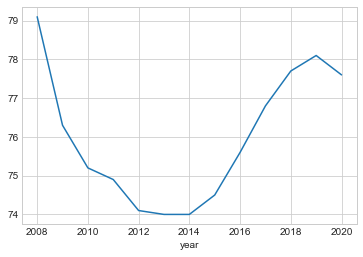

In [116]:
# Data frame with roskilde
empl_roskilde = empl_long.loc[empl_long['municipality'] == 'Roskilde', :]

# Plot the content of the data frame
empl_roskilde.plot(x='year',y='empl',legend=False);

We can even do it **interactively**:

In [117]:
import ipywidgets as widgets
def plot_e(df, municipality): 
    I = df['municipality'] == municipality
    ax=df.loc[I,:].plot(x='year', y='empl', style='-o', legend=False)

In [118]:
widgets.interact(plot_e, 
    df = widgets.fixed(empl_long),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=empl_long.municipality.unique(), 
                                    value='Roskilde')
); 

interactive(children=(Dropdown(description='Municipality', index=33, options=('Copenhagen', 'Frederiksberg', '…

## 2.3 Income

Next, we will read in the avg. disposable income for highly educated in each municipality. Here we do the cleaning, renaming and structuring in a few condensed lines.

In [ ]:
# a. load
inc = pd.read_excel('data/INDKP107.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(4)], axis=1, inplace=True) # using list comprehension
inc.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True) 
inc.rename(columns = {str(i): f'inc{i}' for i in range(2004,2020+1)}, inplace=True) # using dictionary comprehension

# c. drop rows with missing values. Denoted na
inc.dropna(inplace=True)

# d. remove non-municipalities. Notice how to avoid code repetition!
for val in ['Region','Province', 'All Denmark']: 
    I = inc.municipality.str.contains(val)
    inc.drop(inc[I].index, inplace=True) # .index -> get the indexes of the series
    
inc.head(5)

**Convert** wide -> long:

In [ ]:
inc_long = pd.wide_to_long(df=inc, stubnames='inc', i='municipality', j='year')
inc_long.reset_index(inplace=True)
inc_long.head(5)

## 2.4 Municipal area

Finally, let's read in a dataset on municipality areas in km$^2$. 

In [ ]:
# a. load
area = pd.read_excel('data/areal.xlsx', skiprows=2)

# b. clean and rename
area.rename(columns = {'Unnamed: 0':'municipality','2019':'km2'}, inplace=True)

# c. drop rows with missing
area.dropna(inplace=True)

# d. remove non-municipalities
for val in ['Region','Province', 'All Denmark']: 
    I = area.municipality.str.contains(val)
    area.drop(area[I].index, inplace=True)
    
area.head(5)

## 2.5 Writing data

As with reading in data, we have the corresponding functions for **writing data**:

* CSV: `pd.to_csv()`
* SAS: `pd.to_sas()`
* Excel: `pd.to_excel()`
* Stata: `pd.to_stata()`
* Parquet: `pd.to_parquet()`

Let's **save our dataset to CSV form**. We will set `index=False` to avoid saving the index (which does not mean anything here but can in other contexts be an annoying thing). 

In [ ]:
empl_long.to_csv('data/RAS200_long.csv', index=False)
inc_long.to_csv('data/INDKP107_long.csv', index=False)
area.to_csv('data/area.csv', index=False)

## 2.6 Be cautious

Code for cleaning data tend to get long and repetetive. But remember **DRY**! Errors crop up in data cleaning when you just copy blocks of code around. Avoid repetitions at all costs.

<a id="Summary"></a>

# 3. Summary

**This lecture**: We have discussed

1. The generel pandas framework (indexing, assigment, copies vs. views, functions)
2. Loading and saving data
3. Basic data cleaning (renaming, droping etc.)
4. Wide $\leftrightarrow$ long transformations

**Your work:** Before solving Problem Set 3 read through this notebook and play around with the code.

**Next lecture:** Basic data analysis.

**Data exploration?:** Try out [dtale](https://github.com/man-group/dtale).